In [34]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [35]:
def Tukeys_fence(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    X1 = Q1 - 1.5 * (Q3 - Q1) 
    X2 = Q3 + 1.5 * (Q3 - Q1)
    outlier = df.index[(X1 > df[column]) | (df[column] > X2)]
    df.loc[outlier,column] = mean_Fare

In [36]:
test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')

In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
mean_Age = train['Age'].mean()
mean_Fare = train['Fare'].mean()

In [39]:
#sns.lmplot('SibSp','Survived',train)

In [40]:
#sns.lmplot('Parch','Survived',train)

In [41]:
test = test.fillna(0)
train = train.fillna(0)

In [42]:
#train.loc[train["SibSp"] == 8,"SibSp"] = 5
#test.loc[test["SibSp"] == 8,"SibSp"] = 5
#train.loc[train["Parch"] == 6,"Parch"] = 4
#test.loc[test["Parch"] == 6,"Parch"] = 4
train.loc[train["Cabin"] != 0,"Cabin"] = 1
test.loc[test["Cabin"] != 0,"Cabin"] = 1
train.loc[train["Sex"] == "male","Sex"] = 0
train.loc[train["Sex"] == "female","Sex"] = 1
test.loc[test["Sex"] == "male","Sex"] = 0
test.loc[test["Sex"] == "female","Sex"] = 1
train.loc[train["Age"] == 0,"Age"] = mean_Age
test.loc[test["Age"] == 0,"Age"] = mean_Age
train.loc[train["Embarked"] == "S","Embarked"] = 0
train.loc[train["Embarked"] == "C","Embarked"] = 1
train.loc[train["Embarked"] == "Q","Embarked"] = 2
test.loc[test["Embarked"] == "S","Embarked"] = 0
test.loc[test["Embarked"] == "C","Embarked"] = 1
test.loc[test["Embarked"] == "Q","Embarked"] = 2

In [43]:
sns.('Age','Survived',train)

SyntaxError: invalid syntax (<ipython-input-43-c2cd7d2c80ea>, line 1)

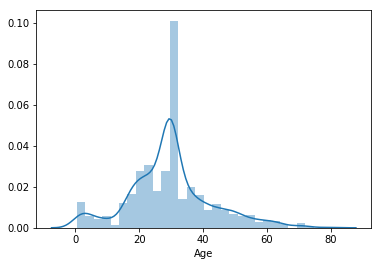

In [44]:
sns.distplot(train['Age'])

In [45]:
#plt.boxplot(train['Fare'])

In [46]:
#plt.boxplot(test['Fare'])

In [47]:
#Tukeys_fence(test,'Fare')
#Tukeys_fence(train,'Fare')

In [48]:
Surv_train = train['Survived']
Id_test = test['PassengerId']
train.drop(['Survived','Name','Ticket','PassengerId'], axis='columns', inplace=True)
test.drop(['Name','Ticket','PassengerId'], axis='columns', inplace=True)

In [49]:
normalized_train = preprocessing.normalize(train)
normalized_test = preprocessing.normalize(test)
decision = ExtraTreesClassifier()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(normalized_train, Surv_train, test_size=0.25, random_state=42)
decision.fit(X_train, y_train)
pred = decision.predict(X_test)
print('Accuracy: \n', accuracy_score(y_test, pred, normalize = True))

Accuracy: 
 0.7623318385650224


C:\Users\aleku\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
#decision.fit(normalized_train, Surv_train)
#pred = decision.predict(normalized_test)
#preds = pd.Series(pred)

C:\Users\aleku\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
#d = {"PassengerId":Id_test, "Survived": preds}
#df1 = pd.DataFrame(d)
#df1.to_csv('answerMax.csv', index = False)